# Assignment 5

### Loading dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

# Loading data
air_quality_data = pd.read_csv('data.csv')
air_quality_data

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),Temp,RH,AH,Day,Month
0,2004-03-10,18,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,Wednesday,3
1,2004-03-10,19,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,Wednesday,3
2,2004-03-10,20,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,Wednesday,3
3,2004-03-10,21,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,Wednesday,3
4,2004-03-10,22,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,Wednesday,3
5,2004-03-11,8,2.0,1333.0,8.0,900.0,174.0,1136.0,112.0,1517.0,1102.0,10.8,57.4,0.7408,Thursday,3
6,2004-03-11,9,2.2,1351.0,9.5,960.0,129.0,1079.0,101.0,1583.0,1028.0,10.5,60.6,0.7691,Thursday,3
7,2004-03-11,10,1.7,1233.0,6.3,827.0,112.0,1218.0,98.0,1446.0,860.0,10.8,58.4,0.7552,Thursday,3
8,2004-03-11,12,1.6,1236.0,5.2,774.0,104.0,1301.0,95.0,1401.0,664.0,9.5,66.8,0.7951,Thursday,3
9,2004-03-11,13,1.9,1286.0,7.3,869.0,146.0,1162.0,112.0,1537.0,799.0,8.3,76.4,0.8393,Thursday,3


I use hierarchical clustering to classify my whole dataset.

Counter({0: 2167, 4: 1362, 3: 1057, 2: 878, 1: 367})
[2 2 2 ... 3 0 4]


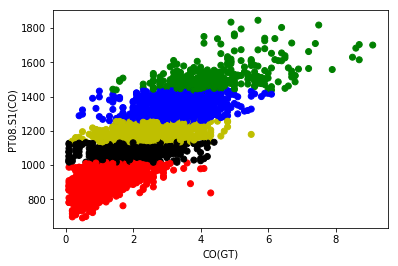

In [2]:
# Hierarchical: Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering
from collections import Counter

def set_colors(labels, colors='rgbykcmw'):
    colored_labels = []
    for label in labels:
        if (label < 0) or (label > 6):
          colored_labels.append(colors[7]) 
        else:
          colored_labels.append(colors[label])
    return colored_labels

# Fit an estimator
estimator = AgglomerativeClustering(n_clusters=5)
X = air_quality_data[["CO(GT)","PT08.S1(CO)"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print(Counter(labels))
print(labels)

colors = set_colors(labels)
plt.scatter(air_quality_data["CO(GT)"], air_quality_data["PT08.S1(CO)"], c=colors)
plt.xlabel("CO(GT)")
plt.ylabel("PT08.S1(CO)")
plt.show()

air_quality_data['labels'] = labels

## Part A
Supervised learning infers a function from labeled training data consisting of a set of training examples.: Predict a dependent variable using at least four classes of base supervised learners.  
  
#### k-Nearest Neighbors

In [3]:
from sklearn import cross_validation # used to test classifier
from sklearn.cross_validation import KFold, cross_val_score, train_test_split
from sklearn import metrics


from datetime import datetime

# Make plots larger
plt.rcParams['figure.figsize'] = (10, 6)
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import roc_curve # ROC Curves
from sklearn.metrics import auc # Calculating AUC for ROC's!
import warnings
warnings.filterwarnings('ignore')

F:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
air_quality_data.shape

(5831, 17)

In [5]:
from sklearn.preprocessing import scale

air_scaled = air_quality_data.iloc[:, 2:14].apply(scale)
air_scaled.head()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),Temp,RH,AH
0,0.477323,1.346399,0.383899,0.502395,-0.415022,1.073040,-0.025922,0.913746,0.635986,-0.370805,-0.042533,-0.483855
1,-0.027792,0.990627,-0.034916,0.101416,-0.763763,1.603089,-0.491001,0.495413,-0.176726,-0.408133,-0.113606,-0.570478
2,0.140579,1.566141,-0.101926,0.030914,-0.608767,1.450363,-0.003775,0.482831,0.103330,-0.582332,0.259527,-0.504237
3,0.140579,1.430111,-0.068421,0.070571,-0.381808,1.234750,0.173398,0.574047,0.457518,-0.694317,0.614892,-0.406349
4,-0.364536,0.885988,-0.520741,-0.422941,-0.608767,1.742339,0.040518,0.278382,0.202173,-0.669431,0.591201,-0.400717


In [6]:
def normalize(df):
    return (df - df.mean()) / (df.max() - df.min())
air_normalized = air_quality_data.iloc[:, 2: 14].apply(normalize)
air_normalized.head()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),Temp,RH,AH
0,0.062999,0.222807,0.053542,0.079123,-0.061454,0.101522,-0.003728,0.180775,0.101907,-0.079895,-0.009113,-0.112550
1,-0.003668,0.163932,-0.004870,0.015972,-0.113093,0.151671,-0.070607,0.098012,-0.028318,-0.087938,-0.024342,-0.132700
2,0.018554,0.259171,-0.014215,0.004869,-0.090142,0.137221,-0.000543,0.095523,0.016557,-0.125472,0.055608,-0.117292
3,0.018554,0.236660,-0.009543,0.011114,-0.056536,0.116822,0.024935,0.113569,0.073310,-0.149600,0.131750,-0.094522
4,-0.048113,0.146616,-0.072627,-0.066609,-0.090142,0.164845,0.005827,0.055075,0.032395,-0.144238,0.126674,-0.093212


In [7]:
X = air_normalized
# setting target
y = air_quality_data.labels

In [8]:
# dividing data to have a training and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)

In [9]:
knn_k = []
for i in range(0, 33): # try up to k = 33
    if (i % 2 != 0):
        knn_k.append(i)

cross_vals = []
for k in knn_k:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cross_vals.append(scores.mean())
    
MSE = [1 - x for x in cross_vals]
optimal_k = knn_k[MSE.index(min(MSE))]
print("Optimal K is {0}".format(optimal_k))

Optimal K is 5


In [10]:
# setting kNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# kNN cross validation

print("KfoldCrossVal mean score using kNN is %s" %cross_val_score(knn, X, y, cv=10).mean())

# kNN metrics
kNNm = knn.fit(X_train, y_train)

y_pred = kNNm.predict(X_test)
print("Accuracy score using kNN is %s" %metrics.accuracy_score(y_test, y_pred))

KfoldCrossVal mean score using kNN is 0.7095452134401319
Accuracy score using kNN is 0.8298328332618946


Answer the following questions for each supervised learner:  
* Which hyper-parameters are important?  
  
The n_neighbors is an important hyper-parameters, because KNN depends on the number of closest neighbors to vote, and then the data is decided which class it belongs to.
* What hyper-parameter values work best?   
  
From the optimal method, I can know that when n_neigbors is 5, the cross-validation score is best, which is why 5 of n_neighbors works best.
* Which supervised learner works best on the test data?    

#### Support Vector Machines(SVMs)

In [36]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

In [40]:
parameters = {'kernel':('linear', 'rbf'), 'C':[1,2,3,4,5,6,7,8,9,10]}
svr = svm.SVC()
grid = GridSearchCV(svr, parameters)
grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'kernel': ('linear', 'rbf'), 'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [39]:
grid.best_params_

{'C': 10, 'gamma': 0.01, 'kernel': 'linear'}

In [41]:
grid.best_score_

0.9559748427672956

In [42]:
#setting svm classifier
svc = grid.best_estimator_

print("KfoldCrossVal mean score using SVM is %s" %cross_val_score(svc,X,y,cv=10).mean())
#SVM metrics
sm = svc.fit(X_train, y_train)
y_pred = sm.predict(X_test)
print("Accuracy score using SVM is %s" %metrics.accuracy_score(y_test, y_pred))

KfoldCrossVal mean score using SVM is 0.963664280787156
Accuracy score using SVM is 0.9751393056150879


Answer the following questions for each supervised learner:  
* Which hyper-parameters are important?  
  
I think the kernal is important, because the SVMs depends on the kernel function to process data and, then classify input.
* What hyper-parameter values work best?   
  
I use grid search to look for the best hyper-parameter, so I get kernel is linear when the whole model works best.
* Which supervised learner works best on the test data?    

#### Decision Trees and Random Forests

In [13]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 

In [14]:
# Decision Tree classifier

DTm = DecisionTreeClassifier()
                                
# Decision Tree cross validation

print("KfoldCrossVal mean score using Decision Tree is %s" %cross_val_score(DTm,X,y,cv=10).mean())

# Decision Tree metrics
sm = DTm.fit(X_train, y_train)

y_pred = sm.predict(X_test)
print("Accuracy score using Decision Tree is %s" %metrics.accuracy_score(y_test, y_pred))

KfoldCrossVal mean score using Decision Tree is 0.9996563533301842
Accuracy score using Decision Tree is 0.9995713673381912


In [15]:
# Random Forest classifier
RFm = RandomForestClassifier(random_state = 42, 
                                criterion='gini',
                                n_estimators = 500,
                                max_features = 5)
                                
# Random Forest cross validation
print("KfoldCrossVal mean score using Random Forest is %s" %cross_val_score(RFm,X,y,cv=10).mean())

# Random Forest metrics
sm = RFm.fit(X_train, y_train)

y_pred = sm.predict(X_test)
print("Accuracy score using Random Forest is %s" %metrics.accuracy_score(y_test, y_pred))

KfoldCrossVal mean score using Random Forest is 0.999485413159244
Accuracy score using Random Forest is 0.9995713673381912


Answer the following questions for each supervised learner:  
* Which hyper-parameters are important?  
  
I think n_estimators and max_features are important hyper-parameters, because random forest is based on the decision tree. n_estimators is the number of decision trees in the forest, and the max_features is maximum of features to split input in a decision tree.
* What hyper-parameter values work best?  
  
I think the values I set already are pretty good, because the validataion score is almost 1.
* Which supervised learner works best on the test data?    

#### Naive Bayes

In [16]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB

In [33]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_class = gnb.predict(X_test)
print ("Accuracy score using Naive Bayes is %s" %metrics.accuracy_score(y_test, y_pred_class))

Accuracy score using Naive Bayes is 0.8401200171453065


Answer the following questions for each supervised learner:  
* Which hyper-parameters are important?  
  
I think there is no important hyper-parameters in the gaussian naive bayes model.
* What hyper-parameter values work best?   
  
Same as above, there is no best values of hyper-parameters.
* Which supervised learner works best on the test data?    

##### Which supervised learner works best on the test data?    
From all the validation scores I get above, I think the random forest works best on the test data. Although the validation score of decision tree is almost same as the random forest, the random forest avoids some cons of decision trees like overfitting, so I think the random forest would be the best choice.

## Part B
Neural networks can be used for supervised learning: Predict a dependent variable using a feed-forward neural network.

In [18]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam

Using TensorFlow backend.


In [19]:
X_train.shape

(3498, 12)

In [47]:
def shallow_net(n = 20, i = 12, o = 5):
    # create simple one dense layer net
    # default 20 neurons, input 12, output 5
    net = Sequential()
    net.add(Dense(n, activation="relu", input_shape=(i,)))
    net.add(Dense(50, activation="relu"))
    net.add(Dense(150, activation="relu"))
    net.add(Dense(150, activation="relu"))
    net.add(Dense(150, activation="relu"))
    net.add(Dense(150, activation="relu"))
    net.add(Dense(50, activation="relu"))
    net.add(Dense(1, activation="relu"))
    #
    net.compile(loss="mean_squared_error", optimizer=Adam(lr=0.0002), metrics=['accuracy'])
    return net

In [48]:
nn = shallow_net()

In [49]:
nn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 20)                260       
_________________________________________________________________
dense_17 (Dense)             (None, 50)                1050      
_________________________________________________________________
dense_18 (Dense)             (None, 150)               7650      
_________________________________________________________________
dense_19 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_20 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_21 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_22 (Dense)             (None, 50)                7550      
__________

In [50]:
nn.fit(X_train, y_train, batch_size=10, epochs=80, verbose=1, validation_data=(X_test, y_test))

Train on 3498 samples, validate on 2333 samples
Epoch 1/80
3498/3498 [==============================] - 2s 471us/step - loss: 2.1910 - acc: 0.2956 - val_loss: 1.1785 - val_acc: 0.4243
Epoch 2/80
3498/3498 [==============================] - 1s 311us/step - loss: 0.9423 - acc: 0.5197 - val_loss: 0.8422 - val_acc: 0.5624
Epoch 3/80
3498/3498 [==============================] - 1s 317us/step - loss: 0.8091 - acc: 0.5663 - val_loss: 0.7722 - val_acc: 0.6005
Epoch 4/80
3498/3498 [==============================] - 1s 318us/step - loss: 0.6520 - acc: 0.6415 - val_loss: 0.6690 - val_acc: 0.6657
Epoch 5/80
3498/3498 [==============================] - 1s 320us/step - loss: 0.5681 - acc: 0.6718 - val_loss: 0.5701 - val_acc: 0.6892
Epoch 6/80
3498/3498 [==============================] - 1s 338us/step - loss: 0.5044 - acc: 0.6941 - val_loss: 0.6263 - val_acc: 0.6918
Epoch 7/80
3498/3498 [==============================] - 1s 329us/step - loss: 0.4570 - acc: 0.7264 - val_loss: 0.5229 - val_acc: 0.7432


3498/3498 [==============================] - 2s 434us/step - loss: 0.0951 - acc: 0.9500 - val_loss: 0.2186 - val_acc: 0.9250
Epoch 61/80
3498/3498 [==============================] - 2s 451us/step - loss: 0.0930 - acc: 0.9517 - val_loss: 0.2384 - val_acc: 0.9331
Epoch 62/80
3498/3498 [==============================] - 2s 445us/step - loss: 0.0945 - acc: 0.9503 - val_loss: 0.2061 - val_acc: 0.9288
Epoch 63/80
3498/3498 [==============================] - 2s 433us/step - loss: 0.1278 - acc: 0.9488 - val_loss: 0.5064 - val_acc: 0.8817
Epoch 64/80
3498/3498 [==============================] - 1s 344us/step - loss: 0.0822 - acc: 0.9554 - val_loss: 0.2468 - val_acc: 0.9276
Epoch 65/80
3498/3498 [==============================] - 1s 325us/step - loss: 0.0918 - acc: 0.9548 - val_loss: 0.1715 - val_acc: 0.9331
Epoch 66/80
3498/3498 [==============================] - 1s 339us/step - loss: 0.0977 - acc: 0.9523 - val_loss: 0.1883 - val_acc: 0.9173
Epoch 67/80
3498/3498 [==============================

In [51]:
nn.evaluate(X_test, y_test)

2333/2333 [==============================] - 0s 55us/step


[0.22185905687463064, 0.9339905703624737]

Answer the following questions for each supervised learner:  
* Which hyper-parameters are important?  
  
The number of neuron, activation function and the number of layers are important. The activation function is to decide when each neuron fires, if there is no a appropriate or good activation function, the whole neural network would easily die.
* What hyper-parameter values work best?   
  
I think the hyper-parameter values I provide above are good, because the validation score is over 0.93.
* How the the neural network compare to the supervised learners in part A?   
  
Obviously, the validation score of supervised learners in Part A are better than neural network, but I think the neural network would be better than the supervised learners in Part A. Because I could run the program more times to improve the accuracy of the model, and the neural network has more potentiality to make progress.

## Part C
Create a stacked ensemble super-model.  
Generate a stacked ensemble super-model for the best learners in parts A & B: Did the stacked ensemble super-model help? 
